<a href="https://colab.research.google.com/github/RaghavPeri/ai-mvp-portfolio/blob/main/fake-review-detector/Fake_Review_Detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🧠 Fake Review Detector – Google Sheets + NLP Classifier

This notebook trains a classifier using labeled review data from Google Sheets and automatically labels new reviews entered in a separate sheet tab.  
It's built to simulate a **real-time trust & fraud detection use case** using supervised NLP.

- **Training Tab:** Uses labeled reviews from `Training Data`
- **New Review Tab:** Accepts a new review in `A2` and auto-fills the predicted label in `B2`

You can rerun the final block to test any new review you input — no retraining needed.


## 📊 Training Tab : Model Setup & Training
This block:

- Installs packages and authenticates Google Sheets  
- Loads labeled review data from the Training Data tab  
- Trains a supervised classifier using TF-IDF + Logistic Regression  

🔁 **Model steps:**
- 📂 Loads review + label columns into a DataFrame  
- 🧠 Transforms review text into vectors (TF-IDF)  
- 🤖 Fits the classification model  
- ✅ Prepares the model for predictions  


              precision    recall  f1-score   support

        fake       1.00      1.00      1.00         5
     genuine       1.00      1.00      1.00         5

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10



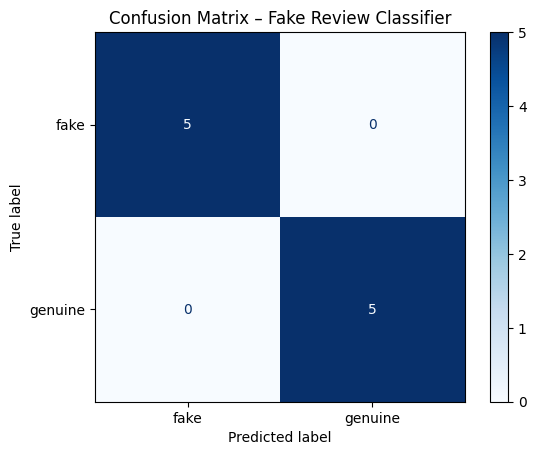

In [16]:
# Step 1: Install necessary packages
!pip install --upgrade gspread scikit-learn pandas --quiet

# Step 2: Import required libraries
import pandas as pd
from google.colab import auth
auth.authenticate_user()
import gspread
from google.auth import default
creds, _ = default()
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

# Step 3: Authenticate and connect to Google Sheets
creds, _ = default()
gc = gspread.authorize(creds)

# Step 4: Define spreadsheet and tab names
spreadsheet_url = "https://docs.google.com/spreadsheets/d/16SDLUn3LwGAFy1vSRNe1ZIJ8fKCM1hBg2NJANfpLYnU/edit"
training_sheet = "Training Data"       # Sheet with labeled review data
new_review_sheet = "New Review"        # Sheet where new review is added

# Step 5: Load the training data from 'Training data' tab
sh = gc.open_by_url(spreadsheet_url)
training_ws = sh.worksheet(training_sheet)
training_data = training_ws.get_all_records()

# Convert training data to DataFrame
df_train = pd.DataFrame(training_data)
reviews = df_train['Review']
labels = df_train['Label']

# Step 6: Train a simple TF-IDF + Logistic Regression pipeline
model = make_pipeline(
    TfidfVectorizer(stop_words='english'),
    LogisticRegression()
)
model.fit(reviews, labels)

from sklearn.metrics import classification_report

# Step 7: Evaluate model on training data
train_preds = model.predict(reviews)
print(classification_report(labels, train_preds))

# Step 8: # Plot confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
cm = confusion_matrix(labels, train_preds, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix – Fake Review Classifier")
plt.show()



## **New Review Tab:** Real-Time Prediction

This block:

Pulls a new review from cell A2

Predicts its label (genuine/fake) using the trained model

Auto-writes the result into B2

Also prints it in Colab output ✅

You only need to rerun this block when testing a new review — no retraining required.

In [17]:
# Step 9: Fetch the new review from 'New Review' tab
new_review_ws = sh.worksheet(new_review_sheet)
new_review_value = new_review_ws.acell('A2').value  # Assuming review is in A2

# Step 10: Predict the label for the new review
predicted_label = model.predict([new_review_value])[0]

# Step 11: Write the predicted label back to column B2 of 'New Review'
new_review_ws.update([[predicted_label]], 'B2')

# Step 12: Print final status
print(f"✅ New review labeled as: {predicted_label}")



✅ New review labeled as: fake


## ✅ MVP Summary: Fake Review Detector with Google Sheets Integration
This MVP classifies user-submitted reviews as **genuine or fake** using a supervised NLP model trained on labeled data from Google Sheets.

### 🔍 What It Does:
- Reads labeled review examples from a **“Training data”** tab in Google Sheets  
- Trains a **TF-IDF + Logistic Regression** classifier for binary classification (genuine/fake)  
- Accepts a new review input in cell **A2** of the **“New Review”** tab  
- Automatically writes the predicted label (genuine/fake) into cell **B2**  
- Displays the prediction in the notebook as well for real-time feedback  

### 🧰 Tech Stack:
- Google Colab + Google Sheets API (via `gspread`)  
- TF-IDF Vectorization (`scikit-learn`)  
- Logistic Regression Classifier  
- `pandas` for data wrangling  

### 🎯 Product Thinking:
- Built for low-friction validation using a real-time sheet-based interface  
- Supports rapid prototyping for trust & fraud applications (e.g. ecommerce, content moderation)  
- Mimics real-world product workflows where users submit content and systems flag suspicious inputs  
- **No retraining required** for each new prediction — once trained, the model continuously evaluates new inputs  
